<a href="https://colab.research.google.com/github/GrzegorzMeller/AlgorithmsForMassiveData/blob/master/CIFAR_CNN_CLASSIFICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercises - 23/04

In the 23/04 lesson we will work on the CIFAR-10 database.

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. 

The dataset is provided with TensorFlow:

In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

(x, y), (x_test, y_test) = keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


The dataset is organized as follows:

In [3]:
print(x.shape, y.shape, x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [0]:
#data normalization
x = x.astype('float32')
x_test = x_test.astype('float32')
x = x / 255.0
x_test = x_test / 255.0

The variable x contains 50000 images with dimension 32 x 32 x 3 (width, height, and three RGB channels).

The variable y represents labels for these 50000 images.

The same holds for the test variables, that refer to 10000 images.

Let's check some training samples:

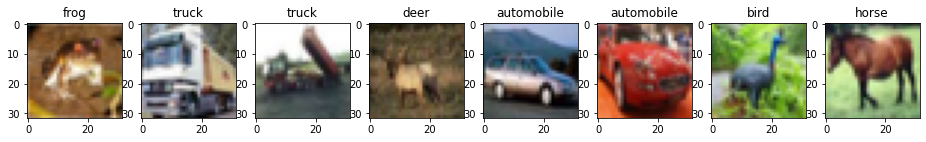

In [5]:
cifar_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
images_to_plot = 8

f, ax = plt.subplots(1, images_to_plot)
f.set_size_inches(16, 6)

for i in range(images_to_plot):
    ax[i].imshow(x[i])
    ax[i].set_title(cifar_classes[y[i][0]])

(50000, 32, 32, 1)


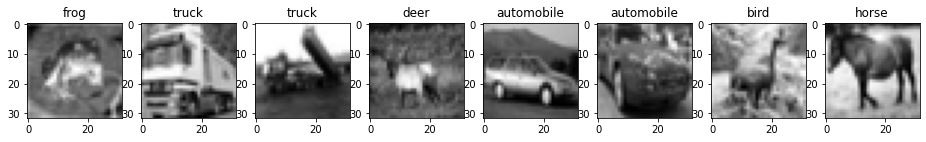

In [9]:
#convert RGB images to grayscale
import numpy as np
import matplotlib.pyplot as plt

X_train = tf.image.rgb_to_grayscale(x, name=None)
print(X_train.shape)

#processing just for visualization
X_train_vis = np. reshape(X_train,(50000,32,32))

cifar_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
images_to_plot = 8

f, ax = plt.subplots(1, images_to_plot)
f.set_size_inches(16, 6)

for i in range(images_to_plot):
    ax[i].imshow(X_train_vis[i], cmap='gray')
    ax[i].set_title(cifar_classes[y[i][0]])

In [10]:

#one hot encoding
Y_train = tf.reshape(tf.one_hot(y, 10),[50000, 10])
Y_test = tf.reshape(tf.one_hot(y_test, 10),[10000, 10])

X_test = tf.image.rgb_to_grayscale(x_test, name=None)

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)
print(Y_train)

(50000, 32, 32, 1)
(50000, 10)
(10000, 32, 32, 1)
(10000, 10)
tf.Tensor(
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]], shape=(50000, 10), dtype=float32)


## Concolutional Neural Networks approach

Test Convolutional Neural Networks (CNN) with RGB images as input.

In this case the design of the architecture can be difficult. Then start from a well-kwown model: consider the VGG model (reference paper: [Very Deep Convolutional Networks for Large-Scale Image Recognition](https://arxiv.org/abs/1409.1556)). A VGG CNN model with a single VGG block is as follows:

The CNN architecture is obtained stacking convolutional layers with 3×3 filters, followed by max pooling layers. Together, these layers form a block. These blocks are repeated where the number of filters in each block is increased with the depth of the network as a power of 2. Padding is used on the convolutional layers to ensure the height and width of the output feature maps matches the inputs.

For instance, a CNN architecture composed of three VGG blocks is as follows:

In [19]:
model_cnn = tf.keras.Sequential([
    
    # 1st VGG block
    tf.keras.layers.Conv2D(32, (3, 3), padding = "same", input_shape = (32, 32, 1)),
    tf.keras.layers.BatchNormalization(center=True, scale=False),
    tf.keras.layers.Activation("relu"),

    tf.keras.layers.Conv2D(32, (3, 3), padding = "same"),
    tf.keras.layers.BatchNormalization(center=True, scale=False),
    tf.keras.layers.Activation("relu"),

    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.2),

    #2nd VGG block
    tf.keras.layers.Conv2D(64, (3, 3), padding = "same", input_shape = (32, 32, 1)),
    tf.keras.layers.BatchNormalization(center=True, scale=False),
    tf.keras.layers.Activation("relu"),

    tf.keras.layers.Conv2D(64, (3, 3), padding = "same"),
    tf.keras.layers.BatchNormalization(center=True, scale=False),
    tf.keras.layers.Activation("relu"),

    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.2),

    #3rd VGG block
    tf.keras.layers.Conv2D(128, (3, 3), padding = "same", input_shape = (32, 32, 1)),
    tf.keras.layers.BatchNormalization(center=True, scale=False),
    tf.keras.layers.Activation("relu"),

    tf.keras.layers.Conv2D(128, (3, 3), padding = "same"),
    tf.keras.layers.BatchNormalization(center=True, scale=False),
    tf.keras.layers.Activation("relu"),

    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(10, activation = 'softmax')
])

model_cnn.compile(optimizer=tf.keras.optimizers.Adam(lr=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model_cnn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 32)        320       
_________________________________________________________________
batch_normalization_5 (Batch (None, 32, 32, 32)        96        
_________________________________________________________________
activation_5 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_6 (Batch (None, 32, 32, 32)        96        
_________________________________________________________________
activation_6 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)       

In [21]:
history_cnn = model_cnn.fit(X_train,
                    Y_train,
                    batch_size=100,
                    epochs=30,
                    validation_data=(X_test,Y_test),
                    )

Epoch 1/30
500/500 [==============================] - 5s 9ms/step - loss: 0.3819 - accuracy: 0.8675 - val_loss: 0.6980 - val_accuracy: 0.7807
Epoch 2/30
500/500 [==============================] - 5s 9ms/step - loss: 0.3643 - accuracy: 0.8714 - val_loss: 0.6256 - val_accuracy: 0.8089
Epoch 3/30
500/500 [==============================] - 5s 9ms/step - loss: 0.3430 - accuracy: 0.8785 - val_loss: 0.6421 - val_accuracy: 0.8058
Epoch 4/30
500/500 [==============================] - 5s 9ms/step - loss: 0.3347 - accuracy: 0.8812 - val_loss: 0.6786 - val_accuracy: 0.8015
Epoch 5/30
500/500 [==============================] - 5s 9ms/step - loss: 0.3275 - accuracy: 0.8852 - val_loss: 0.6836 - val_accuracy: 0.7991
Epoch 6/30
500/500 [==============================] - 5s 9ms/step - loss: 0.3117 - accuracy: 0.8894 - val_loss: 0.7176 - val_accuracy: 0.7782
Epoch 7/30
500/500 [==============================] - 5s 9ms/step - loss: 0.3021 - accuracy: 0.8924 - val_loss: 0.6786 - val_accuracy: 0.8000
Epoch 